# Problem 2

In [ ]:
# for basic operations
import numpy as np
import pandas as pd

# datetime operations
from datetime import datetime

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('movies.csv')
data

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


In [ ]:
ratings = pd.read_csv('ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
data = pd.merge(data,ratings, on='movieId',how='inner')
data

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
96806,161582,Hell or High Water (2016),Crime|Drama,610,4.0,1493847759
96807,161594,Kingsglaive: Final Fantasy XV (2016),Action|Adventure|Animation|Drama|Fantasy|Sci-Fi,184,3.5,1537107946
96808,161830,Body (2015),Drama|Horror|Thriller,448,1.0,1472493010
96809,161918,Sharknado 4: The 4th Awakens (2016),Action|Adventure|Horror|Sci-Fi,448,1.5,1472929873


In [ ]:
# as we do not require the movieId,userId and timestamp column lets remove them
data = data.drop(columns=['movieId','userId','timestamp'])
data

,title,genres,rating
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5
3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.5
4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5
...,...,...,...
96806,Hell or High Water (2016),Crime|Drama,4.0
96807,Kingsglaive: Final Fantasy XV (2016),Action|Adventure|Animation|Drama|Fantasy|Sci-Fi,3.5
96808,Body (2015),Drama|Horror|Thriller,1.0
96809,Sharknado 4: The 4th Awakens (2016),Action|Adventure|Horror|Sci-Fi,1.5


To create a pivot table that calculates the mean of the numeric columns for each combination of title and genres, you can use the pd.pivot_table() function.

In [ ]:
# we have to groupby the dataset based on the title
data = pd.pivot_table(data,index=['title','genres'],aggfunc='mean')
data

,,rating
title,genres,
'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000
'Round Midnight (1986),Drama|Musical,3.500000
'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000
'Til There Was You (1997),Drama|Romance,4.000000
"'burbs, The (1989)",Comedy,3.176471
...,...,...
eXistenZ (1999),Action|Sci-Fi|Thriller,3.863636
xXx (2002),Action|Crime|Thriller,2.770833
xXx: State of the Union (2005),Action|Crime|Thriller,2.000000


In [ ]:
# reset the index 
data.reset_index(level=['title','genres'],inplace=True)
data.head()

,title,genres,rating
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000
1,'Round Midnight (1986),Drama|Musical,3.500000
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000
3,'Til There Was You (1997),Drama|Romance,4.000000
4,"'burbs, The (1989)",Comedy,3.176471


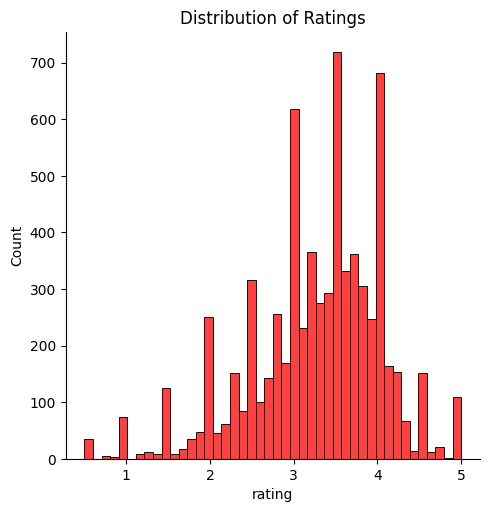

In [ ]:
plt.rcParams['figure.figsize'] = 10,5
sns.displot(data['rating'],color='red')
plt.title('Distribution of Ratings')
plt.show()

In [ ]:
# let extract the year of movie release
data['y'] = data['title'].str.split(" ")
data['year'] = data['y'].apply(lambda x: x[-1])

data = data.drop('y',axis=1)

data['year'] = data['year'].str.strip('(')
data['year'] = data['year'].str.strip(')')

pd.set_option('display.max_rows', 110)
data['year'].value_counts()

2002    244
1996    240
1995    228
2001    227
1998    225
2000    225
1999    221
1997    217
2004    206
2006    204
1994    198
2003    197
2007    195
2005    195
2009    190
2008    189
2011    180
2010    179
2014    170
2013    166
1993    166
2012    160
2015    148
1988    133
1992    127
1987    123
1990    117
1989    115
1986    115
1991    111
1985    105
1984     77
1982     71
1983     67
1981     64
1980     63
2016     52
1979     48
1977     47
1978     46
1973     41
1974     39
1971     33
1965     32
1962     32
1955     32
1959     32
1975     32
1964     31
1976     31
1972     30
1966     30
1960     30
1963     29
1968     28
1967     28
1953     26
1957     26
1961     25
1958     24
1970     23
1969     22
1956     22
1954     20
1939     20
1942     20
1940     17
1947     17
1951     16
1950     16
1948     16
1946     16
1949     15
1941     15
1937     14
1952     13
1945     13
1944     12
1936     11
1938     10
1931      9
1933      8
1932      8
1934

In [ ]:
data

,title,genres,rating,year
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000,2004
1,'Round Midnight (1986),Drama|Musical,3.500000,1986
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000,2004
3,'Til There Was You (1997),Drama|Romance,4.000000,1997
4,"'burbs, The (1989)",Comedy,3.176471,1989
...,...,...,...,...
7067,eXistenZ (1999),Action|Sci-Fi|Thriller,3.863636,1999
7068,xXx (2002),Action|Crime|Thriller,2.770833,2002
7069,xXx: State of the Union (2005),Action|Crime|Thriller,2.000000,2005
7070,¡Three Amigos! (1986),Comedy|Western,3.134615,1986


In [ ]:
data['year'] = data['year'].replace(('2007-','Despot','Things','Road',''),('2007','2002','2002','2002','1996'))
data['year'] = data['year'].astype(int)

In [ ]:
data.head()

,title,genres,rating,year
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000,2004
1,'Round Midnight (1986),Drama|Musical,3.500000,1986
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000,2004
3,'Til There Was You (1997),Drama|Romance,4.000000,1997
4,"'burbs, The (1989)",Comedy,3.176471,1989


In [ ]:
# lets remove the year from title
data['title'] = data['title'].str.split(" ")
data['title'] = data['title'].apply(lambda x: ' '.join(x[:-1]))
data.head()

,title,genres,rating,year
0,'Hellboy':TheSeedsofCreation,Action|Adventure|Comedy|Documentary|Fantasy,4.000000,2004
1,'RoundMidnight,Drama|Musical,3.500000,1986
2,'Salem'sLot,Drama|Horror|Mystery|Thriller,5.000000,2004
3,'TilThereWasYou,Drama|Romance,4.000000,1997
4,"'burbs,The",Comedy,3.176471,1989


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=735df63f-eaf2-46ab-a8a5-7617b63b3308' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>